In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analysis_support import *
from plots import *

# IMPORTANT: need to install package `cm-super-minimal` and `dvipng` for matplotlib Latex Output to work

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
instance_set = 'all'
instances = None
#instance_set = 'handcrafted'
#instances = [119, 160, 188, 192, 196, 250, 261, 263, 278, 287]

In [3]:
no_goods_type = 'single_edge'
#no_goods_type = 'multi_edge'

In [4]:
solver = 'a_star'

In [5]:
seeds = [1, 41, 83, 139, 181, 257, 307, 353, 401, 449]

In [6]:
file_pattern = f'classic.speed.BARN-{instance_set}/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
table = tabulate_deterministic_results(results)

classic.speed.BARN-all/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json
Found 22048 result files
Error decoding JSON file: classic.speed.BARN-all\halton.classic.polytrace.bk\lazy_prm_classic.BARN.instance_063.halton.a_star.single_edge.bk.seed.307.max_speed.1.5step_size.polytrace.20-0.5.json
Message: Expecting ',' delimiter: line 16118 column 14 (char 367954)
Error decoding JSON file: classic.speed.BARN-all\uniform.classic.polytrace.bk\lazy_prm_classic.BARN.instance_062.uniform.a_star.single_edge.bk.seed.1.max_speed.1.5step_size.polytrace.20-0.5.json
Message: Expecting ',' delimiter: line 4882 column 26 (char 98168)
Missing results: 0


In [7]:
table.head()

,domain,instance,seed,sequence,max_speed,no_good_type,solver,direction,check_type,num_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,elapsed_time,plan_time,verif_time,iterations,valid,exact_verification_time,step_size,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_000,1,halton,1.5,single_edge,a_star,bk,unknown,1,52,276,4,6.332786,0.111734,0.020577,0.008244,5,False,1.199871,0.02,10.753609,10.995665,10.813530,11.046182,11
1,BARN,instance_000,1,halton,2.0,single_edge,a_star,bk,unknown,2,52,456,4,6.332786,0.141871,0.001867,0.006371,6,True,0.666398,0.02,10.677570,10.919626,10.720854,10.962206,10
2,BARN,instance_000,139,halton,1.5,single_edge,a_star,bk,unknown,1,52,276,4,6.332786,0.166048,0.001539,0.003879,5,False,0.636210,0.02,10.753609,10.995665,10.813530,11.046182,11
3,BARN,instance_000,139,halton,2.0,single_edge,a_star,bk,unknown,2,52,456,4,6.332786,0.154746,0.002006,0.022794,6,True,0.392832,0.02,10.677570,10.919626,10.720854,10.962206,10
4,BARN,instance_000,181,halton,1.5,single_edge,a_star,bk,unknown,1,52,276,4,6.332786,0.049987,0.001638,0.003947,5,False,0.723762,0.02,10.753609,10.995665,10.813530,11.046182,11


# Bohlin-Kavraki directions

In [8]:
configs, tables = tabulate_results_by(table, ('check_type','step_size','direction','max_speed'))


[array(['polytrace', 'unknown'], dtype=object), array([0.02, 0.1 ]), array(['bk'], dtype=object), array([1.5, 2. ])]
Tables generated: 8


In [9]:
tabulate_coverage(configs, tables)

Ignoring empty table for: ('polytrace', 0.02, 'bk', 1.5)
Ignoring empty table for: ('polytrace', 0.02, 'bk', 2.0)
Ignoring empty table for: ('unknown', 0.1, 'bk', 1.5)
Ignoring empty table for: ('unknown', 0.1, 'bk', 2.0)


,config,total,valid,invalid
0,"(polytrace, 0.1, bk, 1.5)",4142,4142,0
1,"(polytrace, 0.1, bk, 2.0)",5906,5906,0
2,"(unknown, 0.02, bk, 1.5)",6000,160,5840
3,"(unknown, 0.02, bk, 2.0)",5998,842,5156


In [10]:
cov_from_step_size = {}
for v in configs:
    if len(tables[v]) > 0:
        cov_from_step_size[v] = coverage_over_time(select_valid_instances(tables[v]))

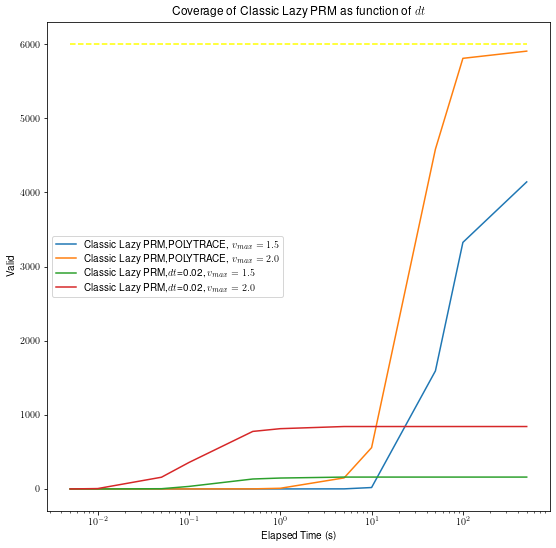

In [11]:
plt.figure(figsize=(9, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')
for v in configs:
    if len(tables[v]) > 0 and v[2] == 'bk':
        label = 'Classic Lazy PRM,'
        if v[0] == 'polytrace':
            label += 'POLYTRACE'
        else:
            label += '$dt$={}'.format(v[1])
        label += ', ${} = {}$'.format('v_{max}', v[-1])
        plt.plot(default_time_breakpoints, cov_from_step_size[v], label=label)

plt.title('Coverage of Classic Lazy PRM as function of $dt$')
plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
plt.ylabel('Valid')
plt.legend()
plt.show()